In [44]:
import numpy as np
import matplotlib.pyplot as plt

m3day_stbday = (3.28084**3) / 5.615 * (60*60*24)
sec2year = 1 / (60*60*24*365.2425)

nx, ny, nz = 128, 128, 1
nr, nt, nw = 1000, 40, 4

In [33]:
poro = np.load('data/porosity.npy')
perm = np.load('data/permeability.npy')
facies = np.load('data/facies.npy')
print('Poro: {} | Perm: {} | Facies: {}'.format(poro.shape, perm.shape, facies.shape))

pressure = np.load('data/pressure.npy')
saturation = np.load('data/saturation.npy')
wells = np.load('data/wells.npy')
print('Pressure: {} | Saturation: {} | Wells: {}'.format(pressure.shape, saturation.shape, wells.shape))

inj_idx = [[63], [63]]
prod_idx = [[0, 0, 127, 127], [0, 127, 0, 127]]
timesteps = np.load('data/timesteps.npy')

Poro: (1000, 128, 128) | Perm: (1000, 128, 128) | Facies: (1000, 128, 128)
Pressure: (1000, 40, 128, 128) | Saturation: (1000, 40, 128, 128) | Wells: (1000, 40, 4, 3)


In [54]:
sample = 905 #92

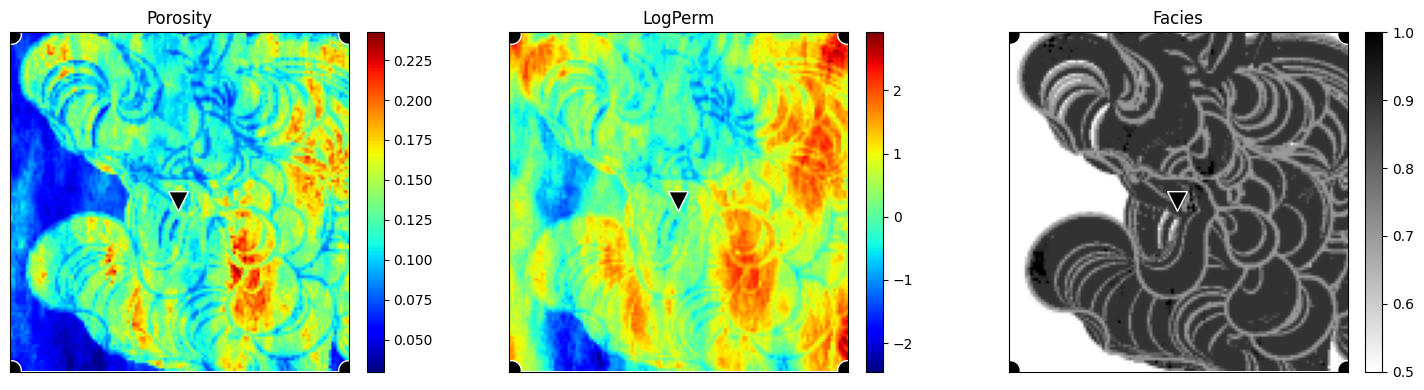

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
ax1, ax2, ax3 = axs

im1 = ax1.imshow(poro[sample], cmap='jet')
im2 = ax2.imshow(perm[sample], cmap='jet')
im3 = ax3.imshow(facies[sample], cmap='binary')

[a.scatter(inj_idx[0], inj_idx[1], color='k', marker='v', edgecolor='w', s=200) for a in axs]
[a.scatter(prod_idx[0], prod_idx[1], color='k', marker='o', edgecolor='w', s=200) for a in axs]
[plt.colorbar(ii, ax=a, pad=0.04, fraction=0.046) for ii, a in zip([im1, im2, im3], axs)]
[a.set(title=['Porosity', 'LogPerm', 'Facies'][i]) for i, a in enumerate(axs)]
[a.set(xticks=[], yticks=[]) for a in axs]
plt.tight_layout()
plt.show()

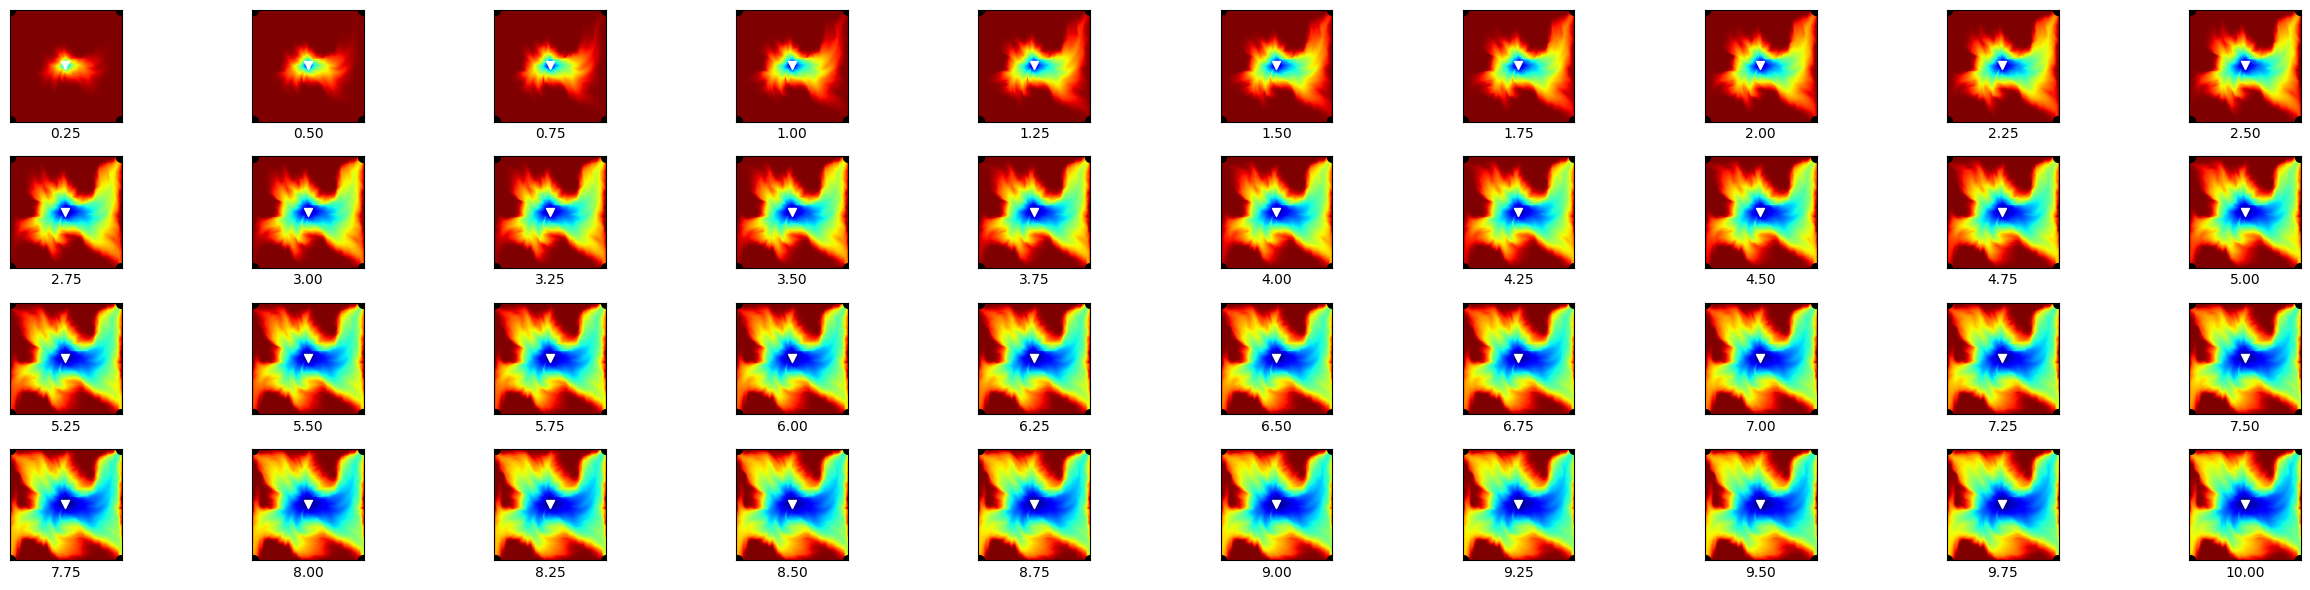

In [56]:
plt.figure(figsize=(25,6))
for i in range(nt):
    plt.subplot(4, 10, i+1)
    plt.imshow(saturation[sample, i], cmap='jet')
    plt.scatter(inj_idx[0], inj_idx[1], color='w', marker='v', s=33)
    plt.scatter(prod_idx[0], prod_idx[1], color='k', marker='o', s=50)
    plt.xticks([]); plt.yticks([]); plt.xlabel('{:.2f}'.format(timesteps[i]))
plt.tight_layout()
plt.show()

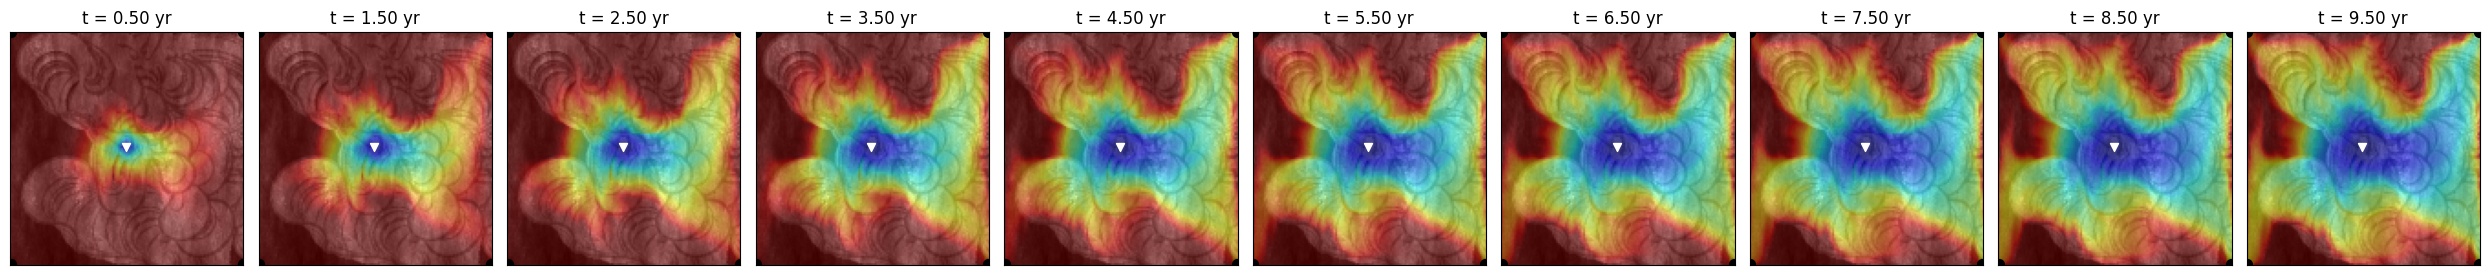

In [57]:
fig, axs = plt.subplots(1, 10, figsize=(25, 4), sharex=True, sharey=True)
for j in range(10):
    k = j * 4 + 1
    axs[j].imshow(poro[sample], cmap='gray')
    axs[j].imshow(saturation[sample, k], cmap='jet', alpha=0.5)
    axs[j].scatter(inj_idx[0], inj_idx[1], color='w', marker='v', s=33)
    axs[j].scatter(prod_idx[0], prod_idx[1], color='k', marker='o', s=50)
    axs[j].set(title='t = {:.2f} yr'.format(timesteps[k]), xticks=[], yticks=[])
plt.tight_layout()
plt.show()

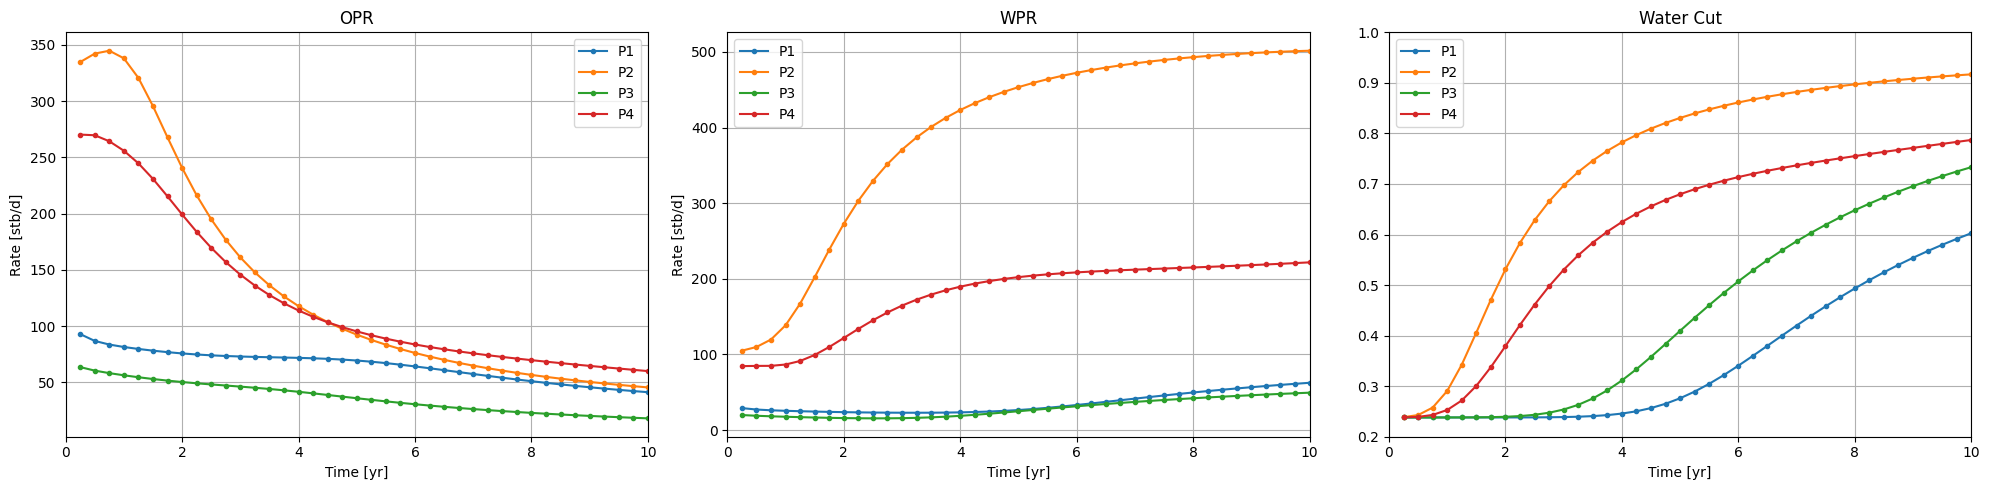

In [58]:
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharex=True)
for i in range(3):
    for j in range(nw):
        axs[i].plot(timesteps, wells[sample,:,j,i], label='P{}'.format(j+1), color='C{}'.format(j), marker='.')
    axs[i].grid(True, which='both')
    axs[i].set(title= ['OPR', 'WPR', 'Water Cut'][i], xlabel='Time [yr]', ylabel='Rate [stb/d]' if i<2 else None)
    axs[i].set(xlim=(0,10), ylim=(0.2,1) if i==2 else None)
    axs[i].legend()
plt.tight_layout()
plt.show()

***
# END